In [6]:
import pandas as pd
import matplotlib as plt
import numpy as np
import bls

In [7]:
cpi = bls.get_series('CUUR0000SA0')
cpi.to_csv('bls_cpi_data.csv')
cpi_data = pd.read_csv('bls_cpi_data.csv')

No Data Available for Series CUUR0000SA0 Year: 2023


In [8]:
cpi_data

,date,CUUR0000SA0
0,2004-01,185.200
1,2004-02,186.200
2,2004-03,187.400
3,2004-04,188.000
4,2004-05,189.100
...,...,...
223,2022-08,296.171
224,2022-09,296.808
225,2022-10,298.012
226,2022-11,297.711


In [9]:
cpi_data.columns = 'Date', 'CPI'

In [10]:
cpi_data

,Date,CPI
0,2004-01,185.200
1,2004-02,186.200
2,2004-03,187.400
3,2004-04,188.000
4,2004-05,189.100
...,...,...
223,2022-08,296.171
224,2022-09,296.808
225,2022-10,298.012
226,2022-11,297.711


In [13]:
wages = bls.get_series('CIU2020000000000A')
wages.to_csv('bls_wages_data.csv')
df = pd.read_csv('bls_wages_data.csv')
df.columns = 'Date', 'Wages'
df.head()

No Data Available for Series CIU2020000000000A Year: 2023


,Date,Wages
0,2004Q1,2.6
1,2004Q2,2.7
2,2004Q3,2.6
3,2004Q4,2.6
4,2005Q1,2.7


In [12]:
df

,Date,Wages
0,2004Q1,2.6
1,2004Q2,2.7
2,2004Q3,2.6
3,2004Q4,2.6
4,2005Q1,2.7
...,...,...
70,2021Q3,4.6
71,2021Q4,5.0
72,2022Q1,5.0
73,2022Q2,5.7


In [14]:
cpi_data['Date'] = cpi_data['Date'].str.replace('-03','Q1')
cpi_data['Date'] = cpi_data['Date'].str.replace('-06','Q2')
cpi_data['Date'] = cpi_data['Date'].str.replace('-09','Q3')
cpi_data['Date'] = cpi_data['Date'].str.replace('-12','Q3')

In [16]:
cpi_data['Date']

0      2004-01
1      2004-02
2       2004Q1
3      2004-04
4      2004-05
        ...   
223    2022-08
224     2022Q3
225    2022-10
226    2022-11
227     2022Q3
Name: Date, Length: 228, dtype: object

In [17]:
newcpi = cpi_data[(cpi_data.Date.str.contains('-') == False)]
newcpi.to_csv('cpi_clean.csv')

In [18]:
newcpi

,Date,CPI
2,2004Q1,187.400
5,2004Q2,189.700
8,2004Q3,189.900
11,2004Q3,190.300
14,2005Q1,193.300
...,...,...
215,2021Q3,278.802
218,2022Q1,287.504
221,2022Q2,296.311
224,2022Q3,296.808


In [19]:
newdf = df
newdf

,Date,Wages
0,2004Q1,2.6
1,2004Q2,2.7
2,2004Q3,2.6
3,2004Q4,2.6
4,2005Q1,2.7
...,...,...
70,2021Q3,4.6
71,2021Q4,5.0
72,2022Q1,5.0
73,2022Q2,5.7


In [20]:
newnum = 177.1
def process_wages(x):
    global newnum
    if type(x) is str:
        return x
    elif x:
        newnum = (x / 400) * newnum + newnum
        return newnum
    else:
        return
newwages = newdf.applymap(process_wages)

In [21]:
newwages

,Date,Wages
0,2004Q1,178.251150
1,2004Q2,179.454345
2,2004Q3,180.620799
3,2004Q4,181.794834
4,2005Q1,183.021949
...,...,...
70,2021Q3,274.041273
71,2021Q4,277.466789
72,2022Q1,280.935124
73,2022Q2,284.938449


In [22]:
merged_data = pd.merge(newcpi,newwages, on='Date')

In [23]:
merged_data

,Date,CPI,Wages
0,2004Q1,187.400,178.251150
1,2004Q2,189.700,179.454345
2,2004Q3,189.900,180.620799
3,2004Q3,190.300,180.620799
4,2005Q1,193.300,183.021949
...,...,...,...
71,2021Q3,278.802,274.041273
72,2022Q1,287.504,280.935124
73,2022Q2,296.311,284.938449
74,2022Q3,296.808,288.642649


Text(0.5, 0, 'Dates')

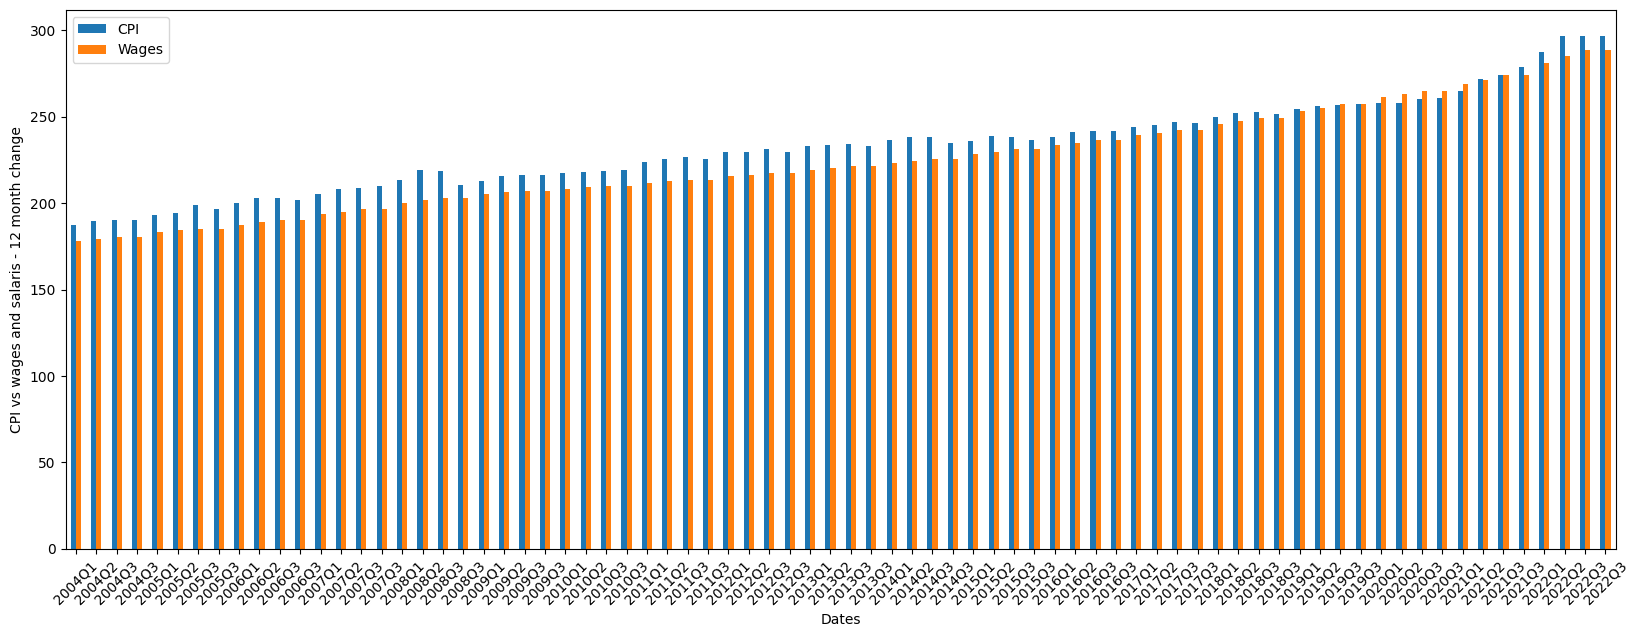

In [25]:
ax = merged_data.plot(kind='bar', figsize=(20,7))
ax.set_xticklabels(merged_data.Date, rotation=45)
ax.set_ylabel('CPI vs wages and salaries - 12 month change')
ax.set_xlabel('Dates')
              

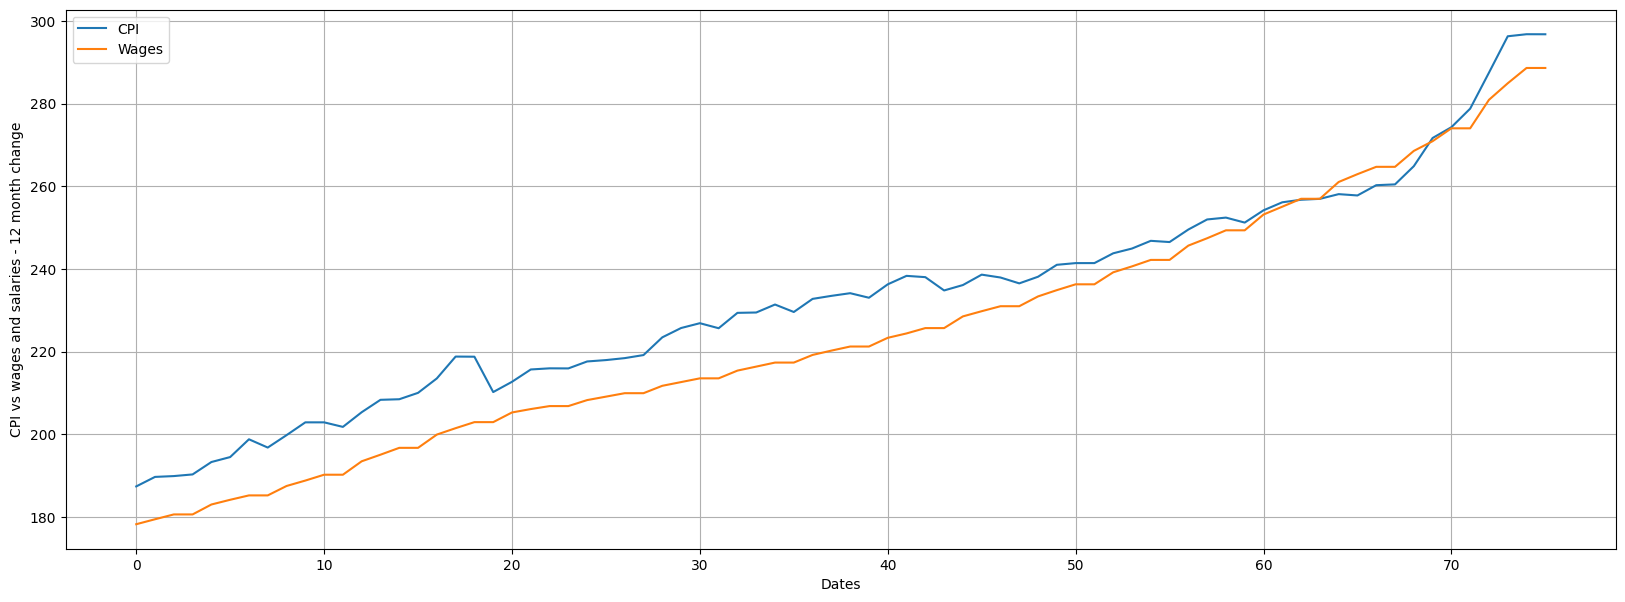

In [28]:
ax = merged_data.plot(kind='line', figsize=(20,7))
ax.set_ylabel('CPI vs wages and salaries - 12 month change')
ax.set_xlabel('Dates')
ax.grid()